# Japanese Second-hand Apartment Price Forecasting 2021

In this notebook, we are going to analyse the Japan secondhand apartment prices.
These datasets are provided by Nishika Japan for an online [competition.](https://www.nishika.co.jp/)
 
## Objective:

Our objective is to predict the Japanese second-hand price apartment.

### Table of Contents

<b>1.DATA ANALYSIS</b>
* 1.1.Basic analysis
* 1.2.Dealing with missing values
* 1.3.Property analysis
* 1.4.Price analysis

<b>2.PRICE PREDICTION</b>
* 2.1.Feature Engineering and data preprocessing
* 2.2.Training and testing
* 2.3.Conclusion

## 1.DATA ANALYSIS
### 1.1.Basic analysis

In [2]:
#Imports
import glob
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#we need to concatenate the data
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('re/train/', "*.csv"))))

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\reshape\concat.py:294: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(


In [3]:
#And to rename columns
df.columns = ['ID', 'Type', 'Region', 'City Code', 'Prefecture Name', 'City Name', 'District Name', 
                'Nearest Station: Name', "Nearest station: Distance (minutes)", "Floor plan", "Area (㎡)", 
                "Land shape", "Frontage", "Total floor area (㎡)", "Building year", "Building structure", "Use", 
                "Purpose of future use", "Front road: Direction", "Front road: Type", "Front road: Width (m)", 
                "City planning", "Building coverage ratio (%)", 'Floor area ratio (%)',
                'At the time of transaction', 'Refurbishment', 'Transaction circumstances, etc.', 
                'Transaction price (total amount) _log']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 0 to 1857
Data columns (total 28 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ID                                     651975 non-null  int64  
 1   Type                                   651975 non-null  object 
 2   Region                                 0 non-null       float64
 3   City Code                              651975 non-null  int64  
 4   Prefecture Name                        651975 non-null  object 
 5   City Name                              651975 non-null  object 
 6   District Name                          651318 non-null  object 
 7   Nearest Station: Name                  649342 non-null  object 
 8   Nearest station: Distance (minutes)    628916 non-null  object 
 9   Floor plan                             629546 non-null  object 
 10  Area (㎡)                               651975 non-null  ob

In [6]:
df.head()

,ID,Type,Region,City Code,Prefecture Name,City Name,District Name,Nearest Station: Name,Nearest station: Distance (minutes),Floor plan,...,Front road: Direction,Front road: Type,Front road: Width (m),City planning,Building coverage ratio (%),Floor area ratio (%),At the time of transaction,Refurbishment,"Transaction circumstances, etc.",Transaction price (total amount) _log
0,1117225,中古マンション等,NaN,1213,北海道,苫小牧市,新中野町,苫小牧,25,３ＬＤＫ,...,NaN,NaN,NaN,準工業地域,60.0,200.0,2018年第３四半期,未改装,NaN,7.431364
1,1001180,中古マンション等,NaN,1101,北海道,札幌市中央区,北２条西,西２８丁目,8,４ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2018年第３四半期,未改装,NaN,7.568202
2,1099061,中古マンション等,NaN,1207,北海道,帯広市,西３条南,帯広,2,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,500.0,2016年第２四半期,未改装,NaN,7.204120
3,1039968,中古マンション等,NaN,1105,北海道,札幌市豊平区,平岸２条,南平岸,6,３ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2018年第４四半期,改装済,NaN,7.447158
4,1072923,中古マンション等,NaN,1202,北海道,函館市,梁川町,五稜郭,30分?60分,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2015年第１四半期,未改装,NaN,7.322219


As shown by this quick analysis, the dataset contains unuseful informations (ID for example) and many rows have missing values.

### 1.2.Dealing with missing values

In [5]:
#Number of missing values
df.isnull().sum(axis = 0)

ID                                            0
Type                                          0
Region                                   651975
City Code                                     0
Prefecture Name                               0
City Name                                     0
District Name                               657
Nearest Station: Name                      2633
Nearest station: Distance (minutes)       23059
Floor plan                                22429
Area (㎡)                                      0
Land shape                               651975
Frontage                                 651975
Total floor area (㎡)                     651975
Building year                             18695
Building structure                        14877
Use                                       50642
Purpose of future use                    363027
Front road: Direction                    651975
Front road: Type                         651975
Front road: Width (m)                   

In [8]:
#Missing values in percentage
round(df.isnull().sum() * 100 / len(df))

ID                                         0.0
Type                                       0.0
Region                                   100.0
City Code                                  0.0
Prefecture Name                            0.0
City Name                                  0.0
District Name                              0.0
Nearest Station: Name                      0.0
Nearest station: Distance (minutes)        4.0
Floor plan                                 3.0
Area (㎡)                                   0.0
Land shape                               100.0
Frontage                                 100.0
Total floor area (㎡)                     100.0
Building year                              3.0
Building structure                         2.0
Use                                        8.0
Purpose of future use                     56.0
Front road: Direction                    100.0
Front road: Type                         100.0
Front road: Width (m)                    100.0
City planning

<AxesSubplot:>

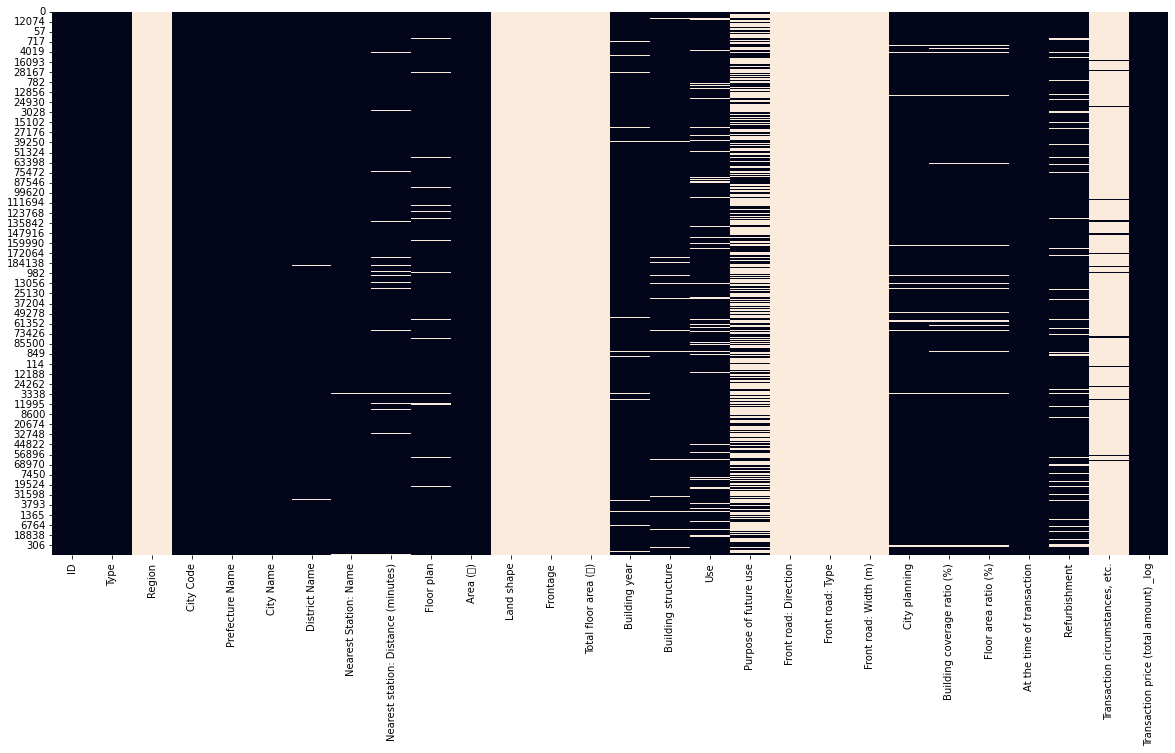

In [24]:
#Heatmap of missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [6]:
#Let's remove useless variables
df = df.drop(['ID',
              'Type',
              'Region',
              'Land shape',
              'Frontage',
              'Total floor area (㎡)',
              'Purpose of future use',
              'Front road: Direction',
              'Front road: Type',
              'Front road: Width (m)',
              'Transaction circumstances, etc.'], axis=1)

In [7]:
#And remove missing values
df = df.dropna()

<AxesSubplot:>

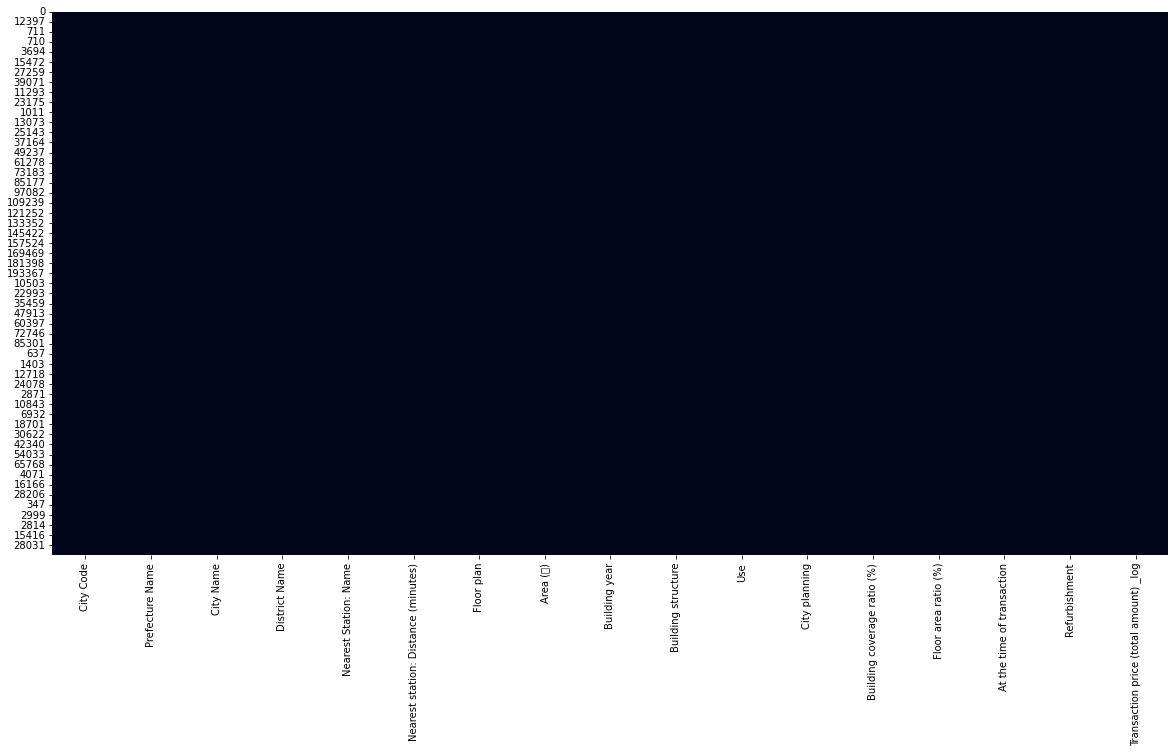

In [27]:
#New heatmap of missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### 1.3.Property analysis

[Japanese front](https://github.com/ElieSDK/Property_Price_Forecasting/tree/main/Front) has to be loaded in order to plot Japanese writing:

In [5]:
front = FontProperties(fname='NotoSansCJKjp-Regular.otf', size=18) 

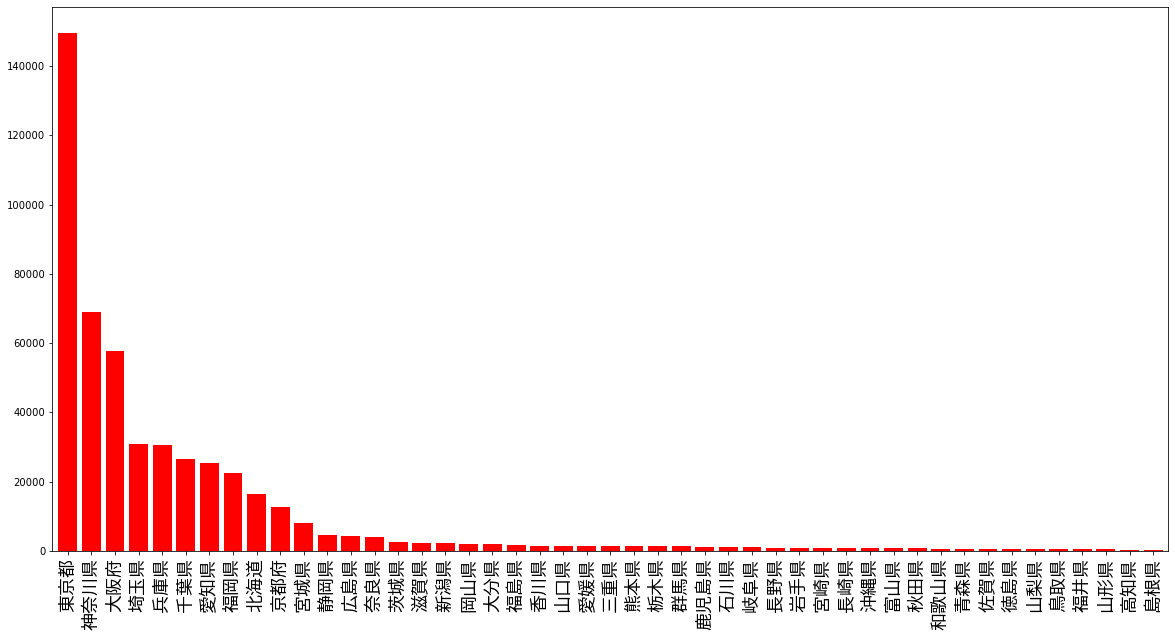

In [28]:
#Prefecture Name
ax = df['Prefecture Name'].value_counts().plot(kind="bar", 
                                               legend=False,
                                               color='red',
                                               width=0.8, 
                                               figsize=(20,10))
for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

This plot shows that most of real estate are located in Tokyo, Kanagawa and Osaka prefecture.

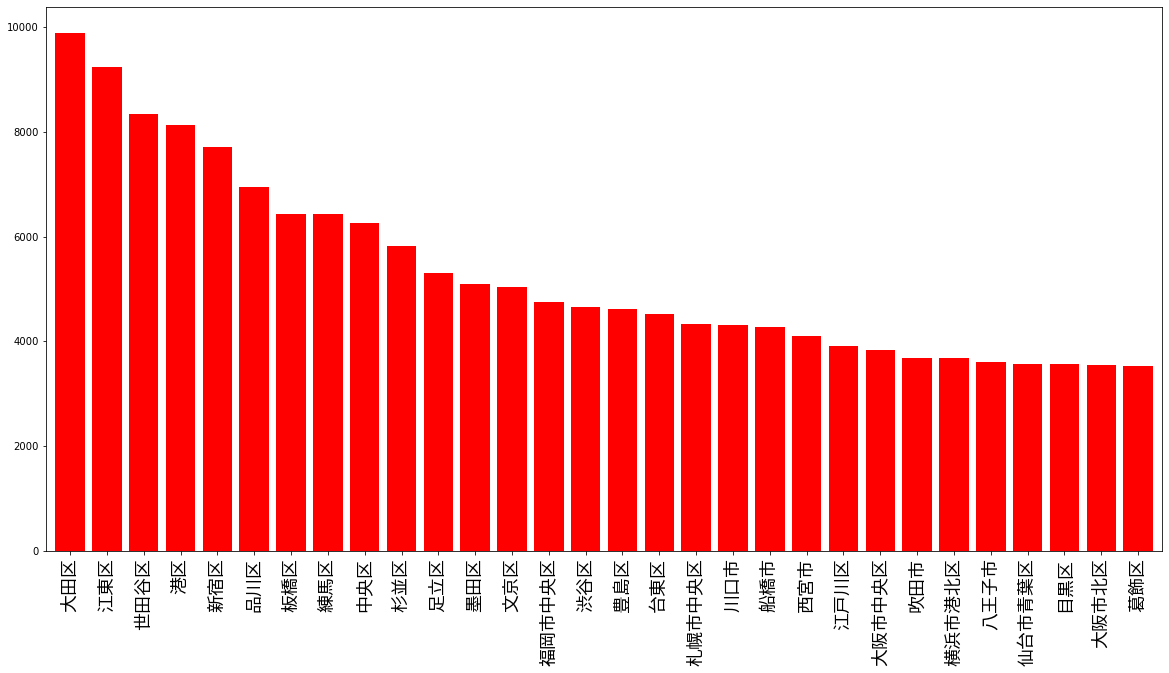

In [29]:
#City Name (top 30)
ax = df['City Name'].value_counts().head(30).plot(kind="bar", 
                                               legend=False,
                                               color='red',
                                               width=0.8, 
                                               figsize=(20,10))
for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

Ōda, Koto, Setagaya, Minato and Shinjuku districts are the most present in the database.

In [9]:
#Average area (m²)
#We first need to change a value because 2000㎡以上 is not a numeric.
pd.unique(df['Area (㎡)'])

array([120, 80, 70, 65, 90, 15, 55, 75, 60, 95, 85, 25, 35, 45, 160, 40,
       105, 20, 50, 100, 125, 110, 30, 145, 115, 150, 130, 155, 135, 190,
       10, 260, 220, 165, 140, 360, 185, 250, 170, 200, '70', '15', '45',
       '80', '40', '25', '35', '55', '85', '50', '20', '65', '75', '30',
       '90', '60', '95', '120', '140', '130', '115', '110', '2000㎡以上',
       '100', '125', '105', 470, 180, 450, 300, 970, 390, 175, 740, 330,
       860, 460, 270, 210, 195, 580, 310, 500, 350, 400, 630, 290, 440,
       1500, 380, 240, 370, 480, 340, 230, 410, 690, 430, 1000, 590, 320,
       520, 730, 280, 890, 1300, 560, 720, 770, '10', '135', '160', '170',
       '175', '145', '270', '180', '320', '185', '155', '195', '210',
       '165', '300', '240', '400', '440', '150', '480', '230', '190',
       '290', '220', '280', '450', '1200', '200', '260', 660, 540, 710,
       960, 900, 940, 700, 650, 760, 680, 790, 610, '650', '660', 510,
       1100, 670, 800, '510', '730', '250', '410', '390', 

In [10]:
#We first convert all values to string
df['Area (㎡)'] = df['Area (㎡)'].astype(str)
#And then we change '2000㎡以上' by 2000
df['Area (㎡)'] = df['Area (㎡)'].replace(['2000㎡以上'], '2000')

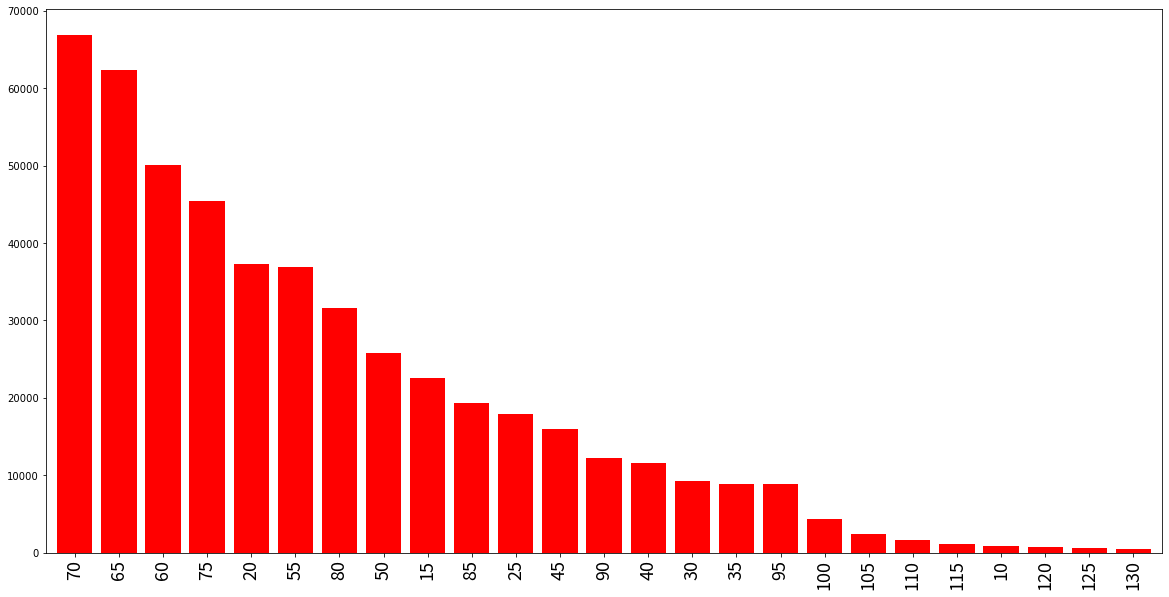

In [33]:
ax = df['Area (㎡)'].value_counts().head(25).plot(kind="bar", 
                                                 legend=False,
                                                 color='red',
                                                 width=0.8, 
                                                 figsize=(20,10),
                                                 stacked=True)
for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

Real estate with a surface of 60m2 to 75m2 are the most present in the database.

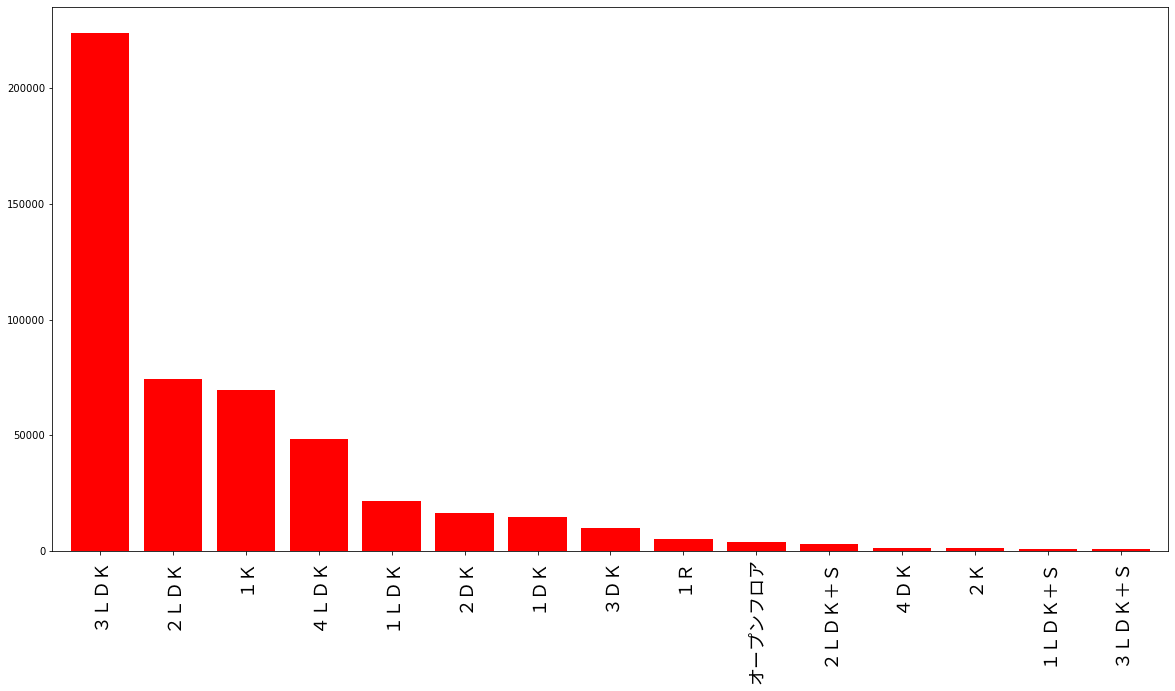

In [34]:
#Floor plan
ax = df['Floor plan'].value_counts().head(15).plot(kind="bar", 
                                                 legend=False,
                                                 color='red',
                                                 width=0.8, 
                                                 figsize=(20,10),
                                                 stacked=True)
for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

Most of real estate are 3LDK, then comes 2LDK and 1K.

### 1.4.Price analysis

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Transaction price (total amount) _log', ylabel='Density'>

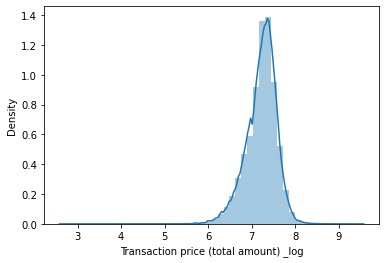

In [35]:
#Transaction price Log Distribution
sns.distplot(df['Transaction price (total amount) _log'])

This graph shows the logarithmic transaction price.

In [38]:
#Average Price by Build Year
#We compute the average building year before plotting it
PvsY = df[['Building year','Transaction price (total amount) _log']].set_index('Building year').stack().reset_index().groupby('Building year').agg('mean')

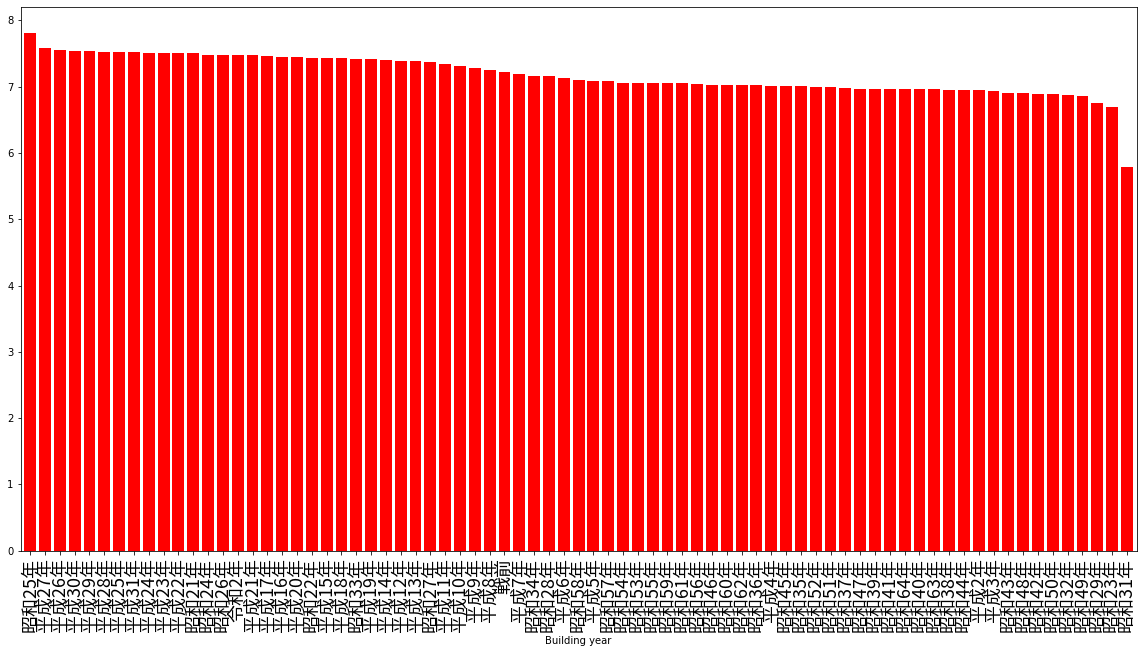

In [39]:
ax = PvsY.sort_values(by=0, ascending=False).plot(kind="bar",
                                                  legend=False,
                                                  color='red',
                                                  width=0.8, 
                                                  figsize=(20,10))

for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

This chart depicts the average price of property against it ages. According to this plot, the older a property is (30 years and more), the cheaper it gets.

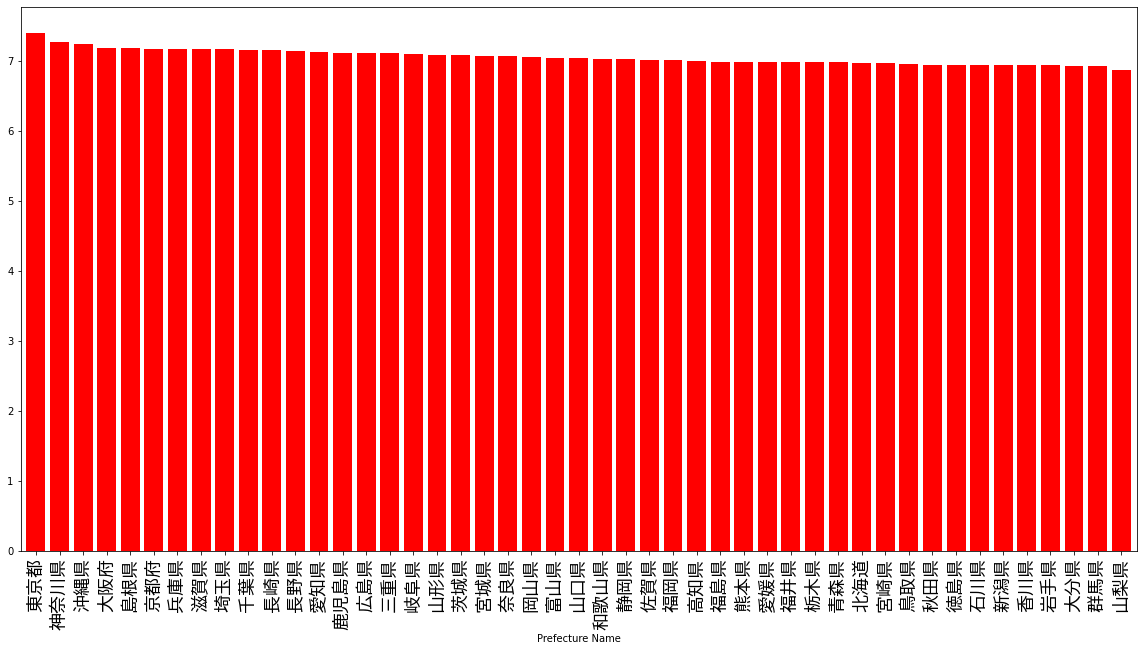

In [40]:
#Average Price by Prefecture
PvsPr = df[['Prefecture Name','Transaction price (total amount) _log']].set_index('Prefecture Name').stack().reset_index().groupby('Prefecture Name').agg('mean')

ax = PvsPr.sort_values(by=0, ascending=False).plot(kind="bar",
                                                   legend=False,
                                                   color='red',
                                                   width=0.8, 
                                                   figsize=(20,10))

for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

Tokyo is the most expensive prefecture but the difference among other prefecture is not significant.

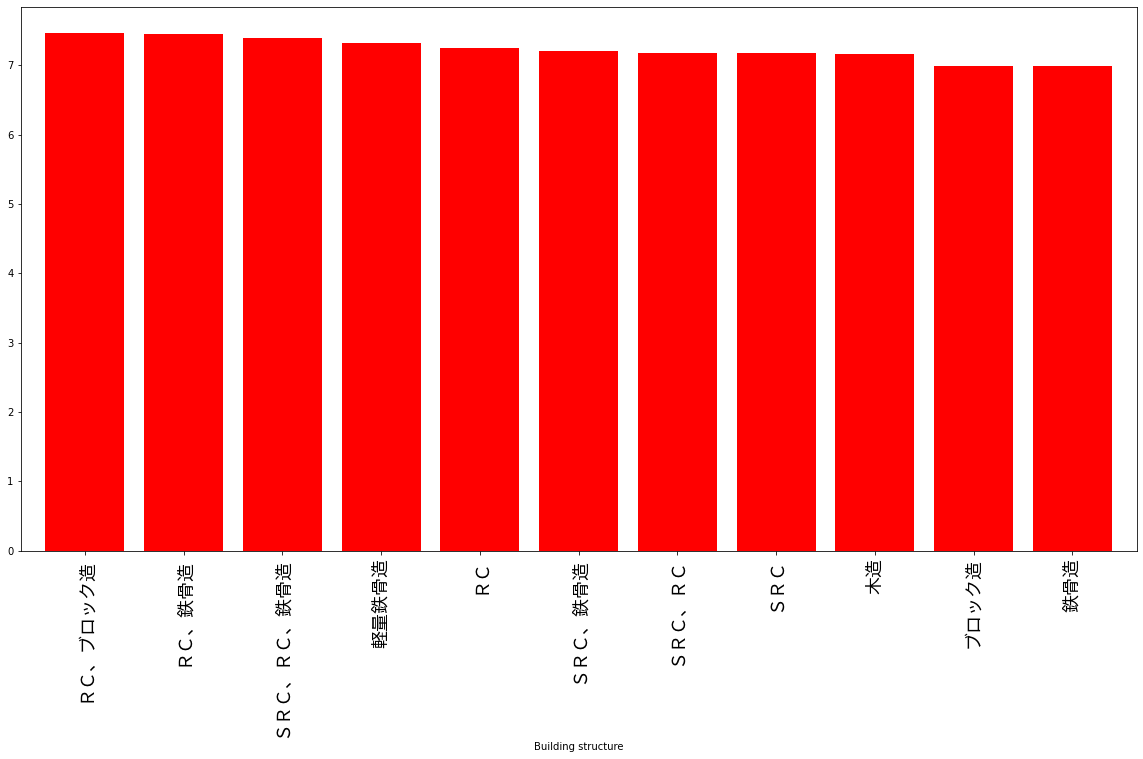

In [41]:
#Average Price by Build Type
PvsBT = df[['Building structure','Transaction price (total amount) _log']].set_index('Building structure').stack().reset_index().groupby('Building structure').agg('mean')

ax = PvsBT.sort_values(by=0, ascending=False).plot(kind="bar",
                                                   legend=False,
                                                   color='red',
                                                   width=0.8, 
                                                   figsize=(20,10))

for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

Regarding the building structure, ＲＣ、ブロック造 (reinforced block concrete) and ＲＣ (reinforced concrete), 鉄骨造 (steel construction) buildings host the most expensive properties.

## 2.PRICE PREDICTION
### 2.1.Feature Engineering and data preprocessing

Before encoding we need to remove variables that are not relevant to the price prediction.

In [43]:
df.nunique()

City Code                                  602
Prefecture Name                             47
City Name                                  602
District Name                            11822
Nearest Station: Name                     3722
Nearest station: Distance (minutes)         34
Floor plan                                  63
Area (㎡)                                   104
Building year                               75
Building structure                          11
Use                                         21
City planning                               15
Building coverage ratio (%)                  6
Floor area ratio (%)                        17
At the time of transaction                  59
Refurbishment                                2
Transaction price (total amount) _log      364
dtype: int64

Columns with too many unique variables will also be removed:<br>
City Code (602)<br>
City Name (602)<br>
District Name (11822)<br>
Nearest Station: Name (3722)<br>

In [11]:
df = df.drop(['City Code',
              'City Name',
              'District Name',
              'Nearest Station: Name'], axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497111 entries, 0 to 1855
Data columns (total 13 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Prefecture Name                        497111 non-null  object 
 1   Nearest station: Distance (minutes)    497111 non-null  object 
 2   Floor plan                             497111 non-null  object 
 3   Area (㎡)                               497111 non-null  object 
 4   Building year                          497111 non-null  object 
 5   Building structure                     497111 non-null  object 
 6   Use                                    497111 non-null  object 
 7   City planning                          497111 non-null  object 
 8   Building coverage ratio (%)            497111 non-null  float64
 9   Floor area ratio (%)                   497111 non-null  float64
 10  At the time of transaction             497111 non-null  ob

"Nearest station: Distance (minutes)" should be a numeric variable:

In [48]:
#We have to rename a few values
pd.unique(df['Nearest station: Distance (minutes)'])

array(['25', '2', '30分?60分', '5', '6', '1', '13', '11', '4', '3', '8',
       '26', '20', '10', '9', '1H?1H30', '12', '18', '7', '21', '16',
       '15', '14', '22', '19', '23', '24', '2H?', '0', '28', '29', '17',
       '27', '1H30?2H'], dtype=object)

In [12]:
#Convert all values to string
df['Nearest station: Distance (minutes)'] = df['Nearest station: Distance (minutes)'].astype(str)
#Replace values
df['Nearest station: Distance (minutes)'] = df['Nearest station: Distance (minutes)'].replace(['30分?60分'], '30')
df['Nearest station: Distance (minutes)'] = df['Nearest station: Distance (minutes)'].replace(['1H?1H30'], '60')
df['Nearest station: Distance (minutes)'] = df['Nearest station: Distance (minutes)'].replace(['2H?'], '120')
df['Nearest station: Distance (minutes)'] = df['Nearest station: Distance (minutes)'].replace(['1H30?2H'], '90')                                                                                 
#Convert to float
df['Nearest station: Distance (minutes)'] = df['Nearest station: Distance (minutes)'].astype(float)

In [13]:
#Remove price column
df_ml = df.drop(['Transaction price (total amount) _log'],axis=1)

In [51]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497111 entries, 0 to 1855
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Prefecture Name                      497111 non-null  object 
 1   Nearest station: Distance (minutes)  497111 non-null  float64
 2   Floor plan                           497111 non-null  object 
 3   Area (㎡)                             497111 non-null  object 
 4   Building year                        497111 non-null  object 
 5   Building structure                   497111 non-null  object 
 6   Use                                  497111 non-null  object 
 7   City planning                        497111 non-null  object 
 8   Building coverage ratio (%)          497111 non-null  float64
 9   Floor area ratio (%)                 497111 non-null  float64
 10  At the time of transaction           497111 non-null  object 
 11  Refurbishment  

We have 3 float variables:<br>
-Nearest station: Distance (minutes)<br>
-Building coverage ratio (%)<br>
-Floor area ratio (%)<br>

We will first encode the non-numerical variables, merge them with the float variables and finally train the dataset.

In [14]:
df_flt = df_ml[['Nearest station: Distance (minutes)', 'Building coverage ratio (%)', 'Floor area ratio (%)']]

df_ml = df_ml.drop(['Nearest station: Distance (minutes)',
                    'Building coverage ratio (%)',
                    'Floor area ratio (%)'],axis=1)

#Convert to string and then encode
df_ml = df_ml.astype('string')

In [15]:
#Define one hot encoding
encoder = OneHotEncoder(sparse=False)
#Transform data
df2x = encoder.fit_transform(df_ml)

#Convert back to dataframe
df2x = pd.DataFrame(df2x)

#Merge with float columns
dfd3x = pd.merge(df2x, df_flt, right_index=True, left_index=True)

#Convert float to int
dfd3x = dfd3x.astype('int64')

dfp = df['Transaction price (total amount) _log']
dfp = dfp.astype('int64')

### 2.2.Training and testing

In [16]:
#Data split for training and testing
X=dfd3x
y=dfp
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

#Initializing model and fitting data into it.
#LogisticRegression
model=LogisticRegression(solver='saga', max_iter=10000)
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Traning accuracy: ",train_score)
print("Testing accuracy: ",test_score)

Traning accuracy:  0.7633169720987306
Testing accuracy:  0.7619363728714684


By using a linear regression model, we managed to get an accuracy of 76%.

### 2.3.Conclusion

We managed to predict the transaction price with an accuracy of 76%, we could try other models in order to improve the accuracy.